In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/ethanbaker/Documents/GersteinLab/STARRseqAnalysis/featureConservation.td',sep='\t',index_col=0)
chroms = df.chrom.unique()
df.head()

,chrom,start,end,name,enrichmentVal,conservation
0,chr2L,46918,52708,MACS_peak_2,381.76,0.091850
1,chr2L,108918,110485,MACS_peak_3,151.61,0.399072
2,chr2L,119520,122136,MACS_peak_4,1606.61,0.346234
3,chr2L,160262,162966,MACS_peak_5,235.12,0.567218
4,chr2L,164982,167431,MACS_peak_6,506.72,0.476483


(0, 6000.0)

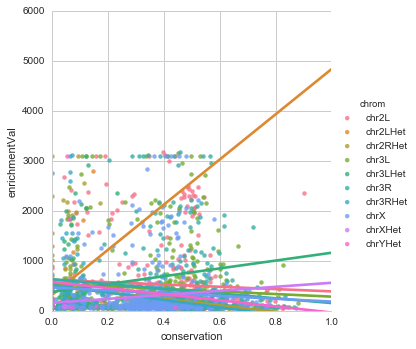

In [9]:
sns.set(style="whitegrid", color_codes=True)
sns.lmplot('conservation','enrichmentVal', data=df, hue='chrom',fit_reg=True,ci=None)
plt.xlim(xmin=0)
plt.ylim(ymin=0)

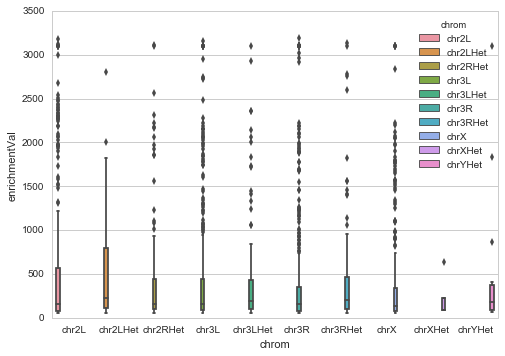

In [10]:
plt.clf()
sns.set(style="whitegrid")
sns.boxplot(x='chrom',y='enrichmentVal',data=df, hue='chrom')

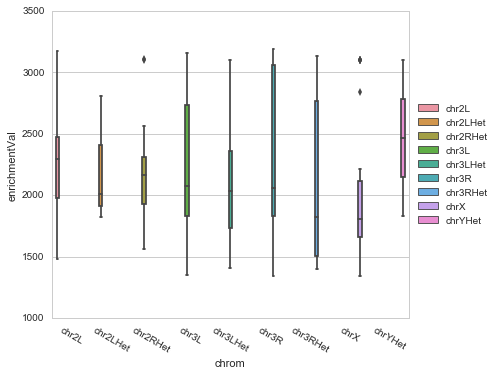

In [11]:
top10 = np.round(len(df.index)/10,decimals=0)
#print n
top10enrichment = df.sort_values('enrichmentVal',ascending=False).head(n=top10)
top10enrichment.sort_values('chrom',ascending=True,inplace=True)
plt.clf()
sns.set(style="whitegrid")
sns.boxplot(x='chrom',y='enrichmentVal',data=top10enrichment, hue='chrom')
ax=plt.subplot(111)
box=ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
for tick in ax.get_xticklabels():
    tick.set_rotation(-30)
plt.legend(bbox_to_anchor=(1,0.5),loc='center left')

In [12]:
t = top10enrichment.chrom.value_counts().to_frame()
t

,chrom
chr2L,49
chr3L,43
chr3R,39
chrX,33
chr2RHet,13
chr3LHet,12
chr3RHet,11
chr2LHet,3
chrYHet,2


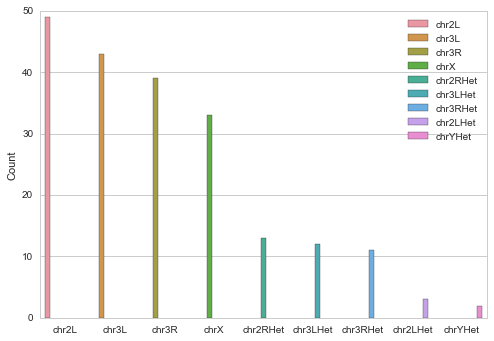

In [13]:
plt.clf()
sns.barplot(x=t.index,y='chrom',data=t,hue=t.index)
plt.ylabel("Count")

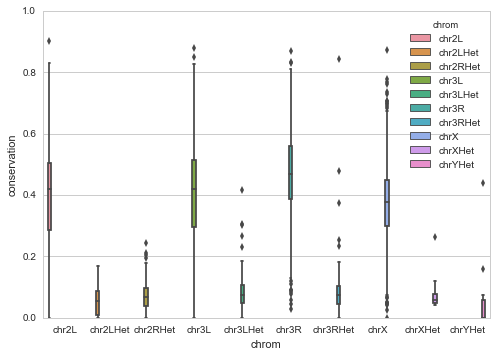

In [14]:
plt.clf()
sns.set(style="whitegrid")
sns.boxplot(x='chrom',y='conservation',data=df, hue='chrom')

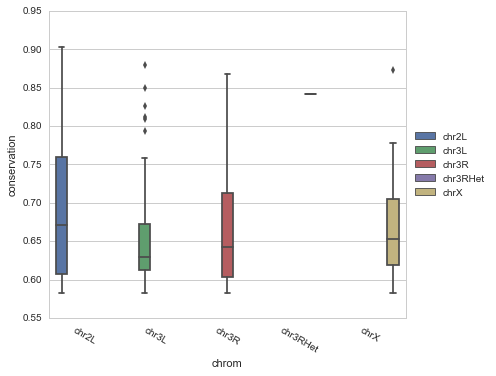

In [15]:
plt.clf()
top10 = np.round(len(df.index)/10,decimals=0)
#print n
top10conservation = df.sort_values('conservation',ascending=False).head(n=top10)
top10conservation.sort_values('chrom',ascending=True,inplace=True)
plt.clf()
sns.set(style="whitegrid")
sns.boxplot(x='chrom',y='conservation',data=top10conservation, hue='chrom')
ax=plt.subplot(111)
box=ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
for tick in ax.get_xticklabels():
    tick.set_rotation(-30)
plt.legend(bbox_to_anchor=(1,0.5),loc='center left')

In [16]:
t = top10conservation.chrom.value_counts().to_frame()
t

,chrom
chr3R,85
chr3L,55
chr2L,35
chrX,29
chr3RHet,1


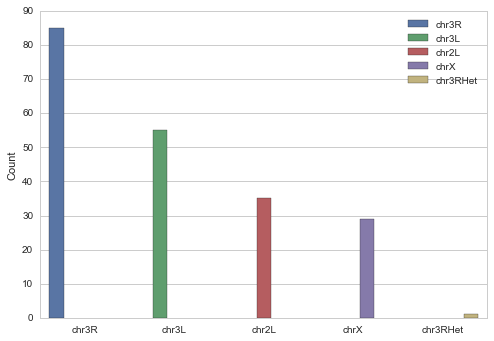

In [11]:
plt.clf()
sns.barplot(x=t.index,y='chrom',data=t,hue=t.index)
plt.ylabel("Count")

In [19]:
plt.clf()
grid = sns.FacetGrid(df, hue="chrom", col_wrap=6)
grid.map(sns.jointplot, x="conservation", y="enrichmentVal", data=df, marker="o", ms=4)


ValueError: num must be 1 <= num <= 0, not 1